# Libraries

In [1]:
import os
import re
import sys
import glob
import datetime
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("d:\softwares\python36\lib\site-packages")
from easyeda import eda
from geohash import encode

# Load Data

In [2]:
filedir = glob.glob(pathname='../Data/*.csv')
filedir

['../Data\\area_passenger_index.csv',
 '../Data\\area_passenger_info.csv',
 '../Data\\grid_strength.csv',
 '../Data\\migration_index.csv',
 '../Data\\shortstay_20200117_20200131.csv',
 '../Data\\shortstay_20200201_20200215.csv']

## area_passenger_info

In [16]:
# load data
area_passenger_info = pd.read_csv(filedir[1], header=None)
area_passenger_info.columns = ['areaIdx', 'areaName', 'areaType', 'centerLon', 'centerLat',
                               'gridLon', 'gridLat', 'coverage']
area_passenger_info.info()

# area type
# 交通设施：0-2，旅游景点：3，教育培训：4，购物：5，医疗：6，运动健身：7
areaTypes = area_passenger_info['areaType'].unique()
normalTypes = {'旅游景点':3,'教育培训':4,'购物':5,'医疗':6,'运动健身':7}
type_to_idx = {}
idx = 0
for item in areaTypes:
    preType = re.match("(.*);(.*)",item)[1]
    if  preType == '交通设施':
        type_to_idx[item] = idx
        idx += 1
    elif preType in normalTypes.keys():
        type_to_idx[item] = normalTypes[preType]
    else:
        print("this type does not exist.")

area_passenger_info['areaType'] = area_passenger_info['areaType'].replace(type_to_idx)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 8 columns):
areaIdx      997 non-null int64
areaName     997 non-null object
areaType     997 non-null object
centerLon    997 non-null float64
centerLat    997 non-null float64
gridLon      997 non-null float64
gridLat      997 non-null float64
coverage     997 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 62.4+ KB


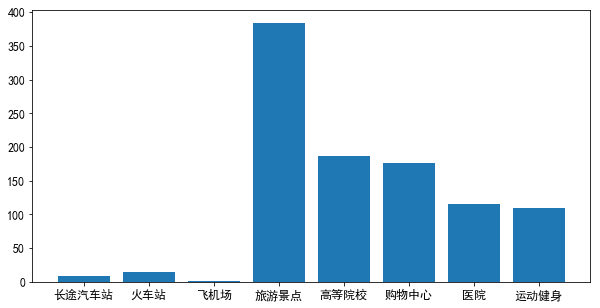

In [4]:
plt.rc("font",family = 'SimHei',size = 12)
plt.figure(figsize=(10,5))
plt.bar(Counter(area_passenger_info['areaType']).keys(),Counter(area_passenger_info['areaType']).values())
xtics = plt.xticks(np.arange(0,8),['长途汽车站','火车站','飞机场','旅游景点','高等院校','购物中心','医院','运动健身'])

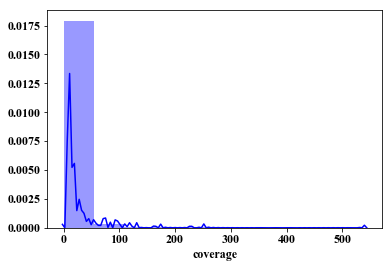

In [5]:
# area coverage
# tranform into the number of grids (200 * 200)
area_passenger_info['coverage'] = area_passenger_info['coverage'] / 4e+4
plt.rc("font",family = 'Times New Roman',size = 12)
sns.distplot(area_passenger_info['coverage'],bins = 10,color = 'b')

Text(0, 0.5, 'Latitude')

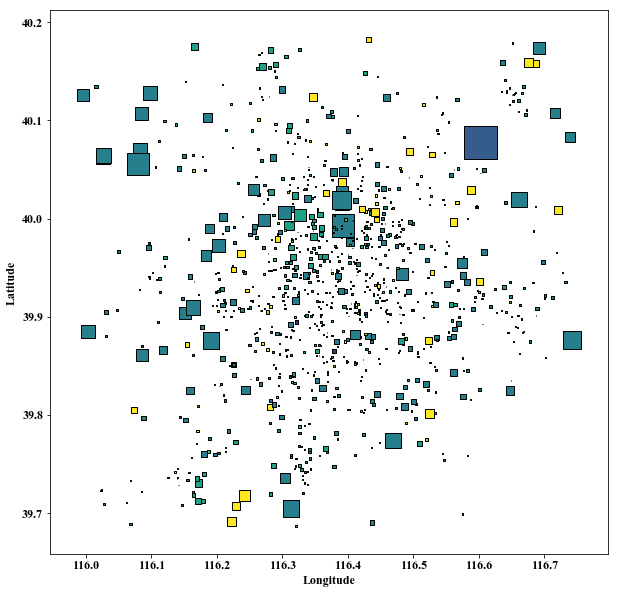

In [13]:
# area center location
plt.figure(figsize=(10,10))
plt.scatter(area_passenger_info['centerLon'],area_passenger_info['centerLat'],
            marker='s',c=area_passenger_info['areaType'],edgecolors='k',s = 2 * area_passenger_info['coverage'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

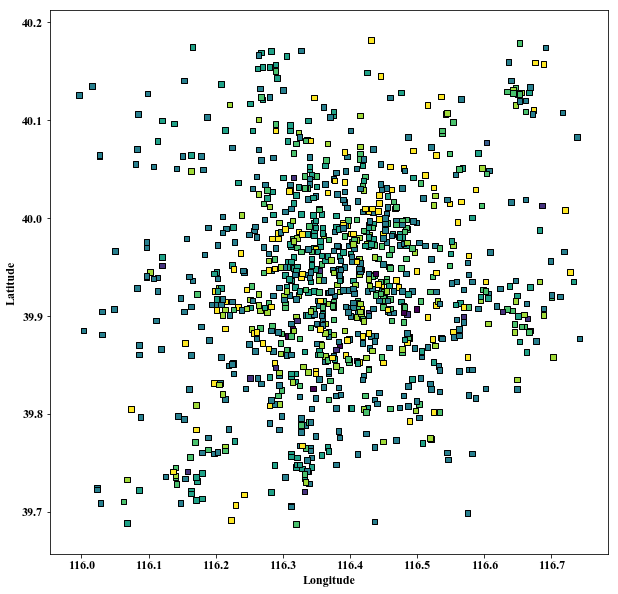

In [8]:
# area center-grid location
plt.figure(figsize=(10,10))
plt.scatter(area_passenger_info['gridLon'],area_passenger_info['gridLat'],
            marker='s',c=area_passenger_info['areaType'],edgecolors='k',s = 30)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## area_passenger_index

In [17]:
area_passenger_ind = pd.read_csv(filedir[0],header = None)
area_passenger_ind.columns = ['areaIdx','datetime','Density']
area_passenger_ind['datetime'] = pd.to_datetime(area_passenger_ind['datetime'],format="%Y%m%d%H")
area_passenger_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717840 entries, 0 to 717839
Data columns (total 3 columns):
areaIdx     717840 non-null int64
datetime    717840 non-null datetime64[ns]
Density     717840 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.4 MB


## grid_strength

In [15]:
grid_strength = np.loadtxt('../Data/datafountain_competition_od.txt')
grid_strength = pd.DataFrame(grid_strength)

grid_strength.columns = ['hour', 'startGridLon', 'startGridLat',
                         'endGridLon', 'endGridLat', 'index']
grid_strength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9341613 entries, 0 to 9341612
Data columns (total 6 columns):
hour            float64
startGridLon    float64
startGridLat    float64
endGridLon      float64
endGridLat      float64
index           float64
dtypes: float64(6)
memory usage: 427.6 MB


## migration_index

In [17]:
migration_index = pd.read_csv(filedir[3],header =None)
migration_index.columns = ['date','departureProvince','departureCity',
                           'arrivalProvince','arrivalCity','index']
migration_index['date'] = pd.to_datetime(migration_index['date'],format="%Y%m%d")
migration_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 6 columns):
date                 21459 non-null datetime64[ns]
departureProvince    21459 non-null object
departureCity        21459 non-null object
arrivalProvince      21459 non-null object
arrivalCity          21459 non-null object
index                21459 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1006.0+ KB


## shortstay_date.csv

In [18]:
shortStay = pd.read_csv(filedir[4], nrows=10000, header=None,sep='\t')
shortStay.columns = ['date','hour','gridLon','gridLat','index']
shortStay['date'] = pd.to_datetime(shortStay['date'],format="%Y%m%d")
shortStay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
date       10000 non-null datetime64[ns]
hour       10000 non-null int64
gridLon    10000 non-null float64
gridLat    10000 non-null float64
index      10000 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 390.7 KB


# Data Analysis

## area attributes analysis

In [60]:
coord = grid_strength.apply(lambda x:encode(x['startGridLon'],x['startGridLat']),axis=1)

In [65]:
print('[Stats] Number of areas: {:d}, number of grid: {:d}'.format(len(area_passenger_info),
                                                                   len(coord.unique())))

[Stats] Number of areas: 997, number of grid: 86555


# First attempt

In [5]:
area_passenger_ind['month'] = area_passenger_ind['datetime'].map(lambda x:x.month)
area_passenger_ind['day'] = area_passenger_ind['datetime'].map(lambda x:x.day)

cond1 = area_passenger_ind['month'] == 2
cond2 = area_passenger_ind['day'] >= 7

historic_pred = area_passenger_ind[cond1 & cond2]['Density']

In [13]:
submit_example = pd.read_csv('../Data/test_submit_example.csv',header = None)
submit_example.iloc[:,2] = list(historic_pred)
submit_example.to_csv('../Data/submit_historic_07_15.csv',index=None,header=None)

In [14]:
submit_example.columns = ['gridIdx','datetime','Density']
submit_example['datetime'] = submit_example['datetime'].map(lambda x:str(x) + '00')
submit_example['datetime'] = pd.to_datetime(submit_example['datetime'])

submit_example['month'] = submit_example['datetime'].map(lambda x:x.month)
submit_example['day'] = submit_example['datetime'].map(lambda x:x.day)

In [15]:
mean = submit_example.pivot_table(index='gridIdx',
                           values='Density',
                           aggfunc='mean').reset_index()
mean.columns = ['gridIdx','MeanDensity']
mean['MeanDensity'] = 0.2 * np.array(mean['MeanDensity']) * np.random.rand(len(mean))

submit_example['Density'] = submit_example['Density'] + pd.merge(submit_example,mean)['MeanDensity']

In [17]:
noisy_historic_pred = submit_example['Density']

submit_example = pd.read_csv('../Data/test_submit_example.csv',header = None)
submit_example.iloc[:,2] = list(noisy_historic_pred)
submit_example.to_csv('../Data/submit_noisy_historic_07_15.csv',index=None,header=None)